In [1]:
import numpy as np 
import numpy.linalg as LA 
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image

# EX 1.3

In [2]:
np.random.seed(10)

In [3]:
class PCA():
    def __init__(self, data):
        self.data = data
        self.mean = np.mean(self.data)
        self.centered = data - self.mean
        self.var = np.var(self.centered)
        self.cov = np.cov(self.centered)
        
        e_val, e_vec = LA.eig(self.cov)

        order = np.argsort(-1*e_val)
        self.e_val_sorted = e_val[order]
        self.e_vec_sorted = e_vec[:,order]
    
    def project(self, data, eigen_vec_order):
        e_vec = self.e_vec_sorted[:,eigen_vec_order]
        return e_vec.T@data, e_vec

    #def transform_all(self,data, keep_m = 2):   
    #    col = np.arange(0 ,keep_m, 1)
    #    pca_ed, e_vec  =  self.project(self.centered, col)
    #    
    #    recovered = pca_ed.T @ e_vec.T + self.mean
    #    error = np.mean(np.square(self.data - recovered.T))
    #    return pca_ed, error

    def transform(self, data, keep_m = 2, is_centered=False):
        if not is_centered:
            centered = data - self.mean
        else:
            centered = data
        col = np.arange(0 ,keep_m, 1)
        pca_ed, e_vec  =  self.project(centered, col)
        
        recovered = pca_ed.T @ e_vec.T + self.mean
        error = np.mean(np.square(data - recovered.T))
        return pca_ed, recovered, error
        
    def plot_scree(self, title='Scree Plot', num_m=-1):
        if num_m == -1:
            num_e_val = self.e_val_sorted.shape[0]
        else:
            num_e_val = num_m
            
        x = np.arange(0, num_e_val, 1)
        x_str = [str(a+1) for a in x]
        
        plt.figure(figsize=(num_e_val, 4))
        plt.bar(x, height=self.e_val_sorted[0:num_e_val], tick_label=x_str)
        plt.title(title)
        plt.xlabel('Principal Component')
        plt.ylabel('Eigen Value')
        plt.show()
    
    def plot_cov(self, title='Covariance Plot'):
        plt.imshow(self.cov)
        plt.title(title)
        plt.xlabel('Feature')
        plt.ylabel('Feature')
        plt.show()

In [4]:
data = np.loadtxt('expDat.txt', skiprows=1, delimiter=',', usecols=np.arange(1,21)).T
data_shuffled = data.copy()
np.random.shuffle(data_shuffled)

#data = data.T
#data_shuffled = data_shuffled.T

In [5]:
pca1 = PCA(data)
pca2 = PCA(data_shuffled)

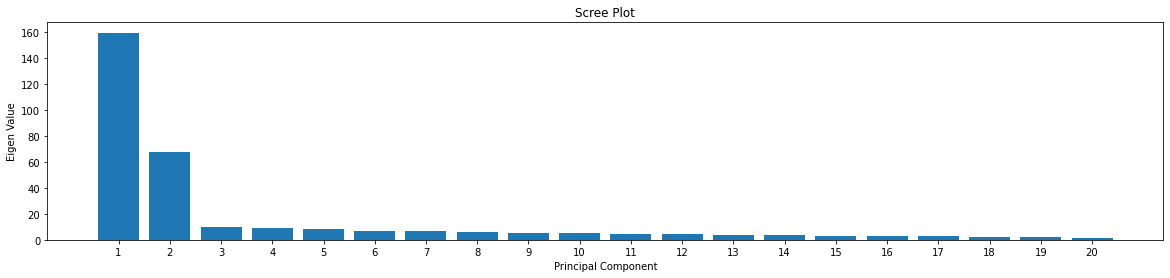

In [6]:
pca1.plot_scree('Scree Plot')

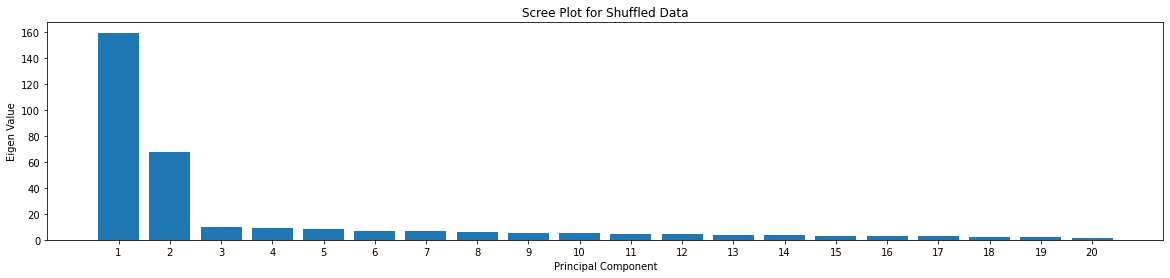

In [7]:
pca2.plot_scree('Scree Plot for Shuffled Data')

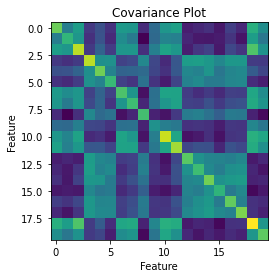

In [8]:
pca1.plot_cov()

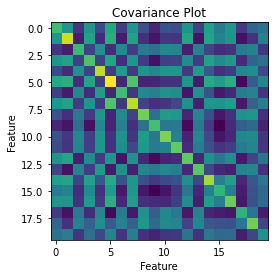

In [9]:
pca2.plot_cov()

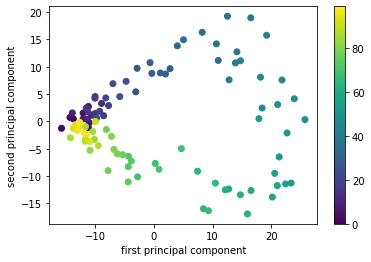

In [10]:
first_prj, _ = pca1.project(pca1.centered, 0)
sec_prj, _ = pca1.project(pca1.centered, 1)
t = np.arange(0, data.shape[1], 1)
plt.scatter(x=first_prj, y=sec_prj, c=t)
plt.colorbar()
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

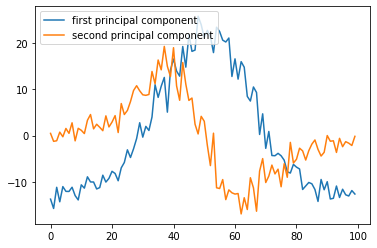

In [11]:
plt.plot(t, first_prj, label='first principal component')
plt.plot(t, sec_prj, label='second principal component')
plt.legend()
plt.show()

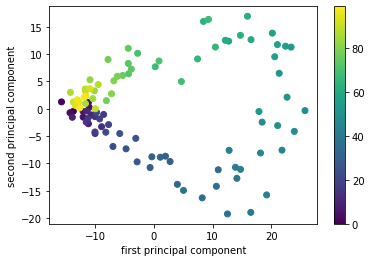

In [12]:
first_prj, _ = pca2.project(pca2.centered,0)
sec_prj, _ = pca2.project(pca2.centered,1)
t = np.arange(0, data.shape[1], 1)
plt.scatter(x=first_prj, y=sec_prj, c=t)
plt.colorbar()
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

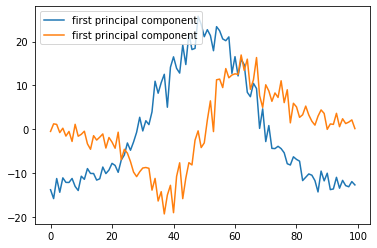

In [13]:
plt.plot(t, first_prj, label='first principal component')
plt.plot(t, sec_prj, label='first principal component')
plt.legend()
plt.show()

## Discussion
Shuffling the row does not change the scree plot. 

# EX 1.4

In [14]:
def get_patches(img, shape=(16, 16)):
    num_patch_y = int(np.floor(img.shape[0]/shape[0])) 
    num_patch_x = int(np.floor(img.shape[1]/shape[1]))
    ret = []
    for i in range(num_patch_x):
        for j in range(num_patch_y):
            patch = img[j*shape[0]:(j+1)*shape[0], i*shape[1]:(i+1)*shape[1]]
            ret.append(patch)
    return ret

In [15]:
def get_image_patches(dir_name, prefix='b', shape=(16,16)):
    g = glob.glob(os.path.join(dir_name, prefix + '*.jpg'))
    patches = []
    for filename in g:
        img = np.asarray(Image.open(filename))
        patches.extend(get_patches(img, shape))
    
    patches = np.array(patches).reshape((-1, shape[0]*shape[1])).T
    return patches

In [16]:
def visualize_pc(pca_instance, title='PC Images', num_pc=24):
    pc_vec = pca_instance.e_vec_sorted[:num_pc,:]
    num_col = 4
    num_row = int(num_pc/num_col)
    fig, ax = plt.subplots(num_row, num_col, figsize=(10,20))
    idx = 0
    
    for j in range(num_row):
        for i in range(num_col):
            img = pc_vec[idx,:].reshape((16,16))
            ax[j,i].imshow(img, cmap='gray')
            ax[j,i].set_title('PC {}'.format(idx))
            
            idx+=1
    
    fig.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

In [17]:
building = get_image_patches('imgpca')
text = get_image_patches('imgpca', 't')
drawing = get_image_patches('imgpca', 'd')
nature = get_image_patches('imgpca', 'n')

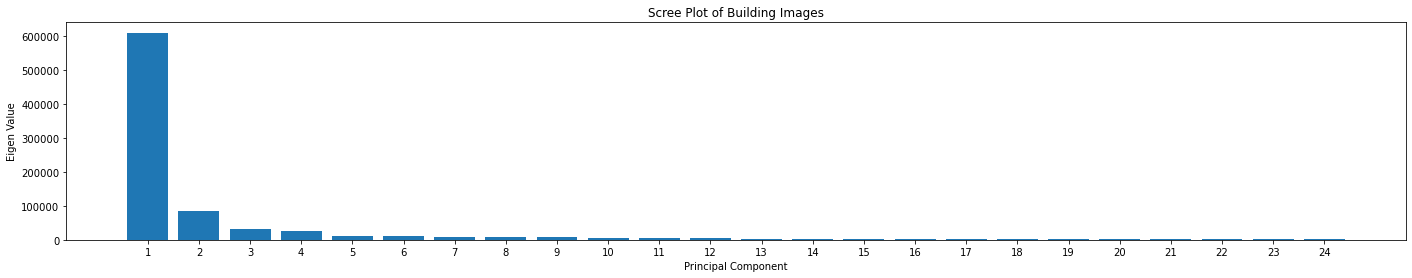

In [18]:
pca_b = PCA(building)
pca_b.plot_scree(title ='Scree Plot of Building Images', num_m=24)

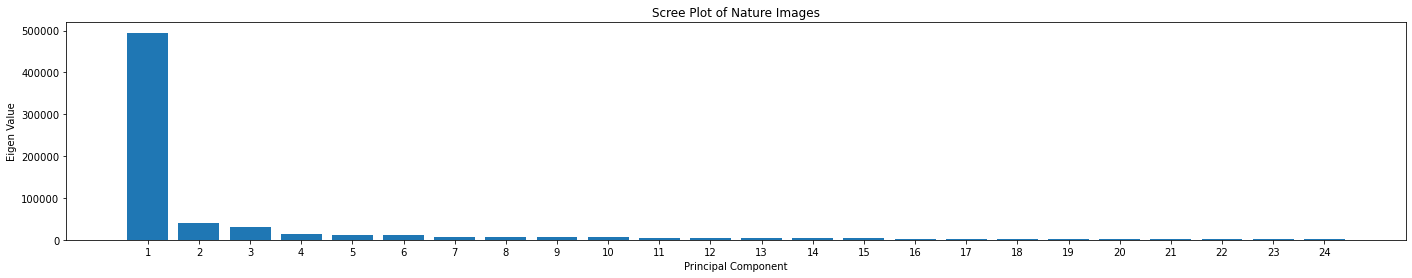

In [19]:
pca_n = PCA(nature)
pca_n.plot_scree(title ='Scree Plot of Nature Images', num_m=24)

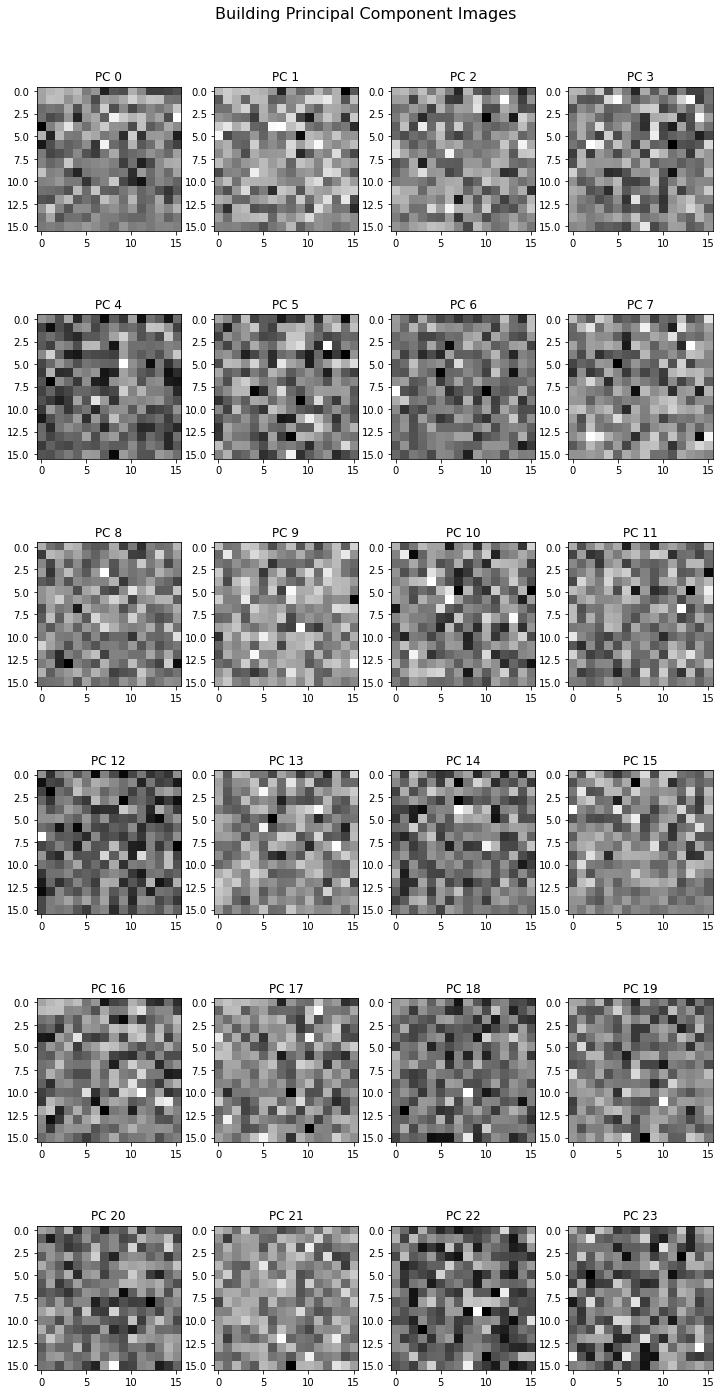

In [20]:
visualize_pc(pca_b, title='Building Principal Component Images')

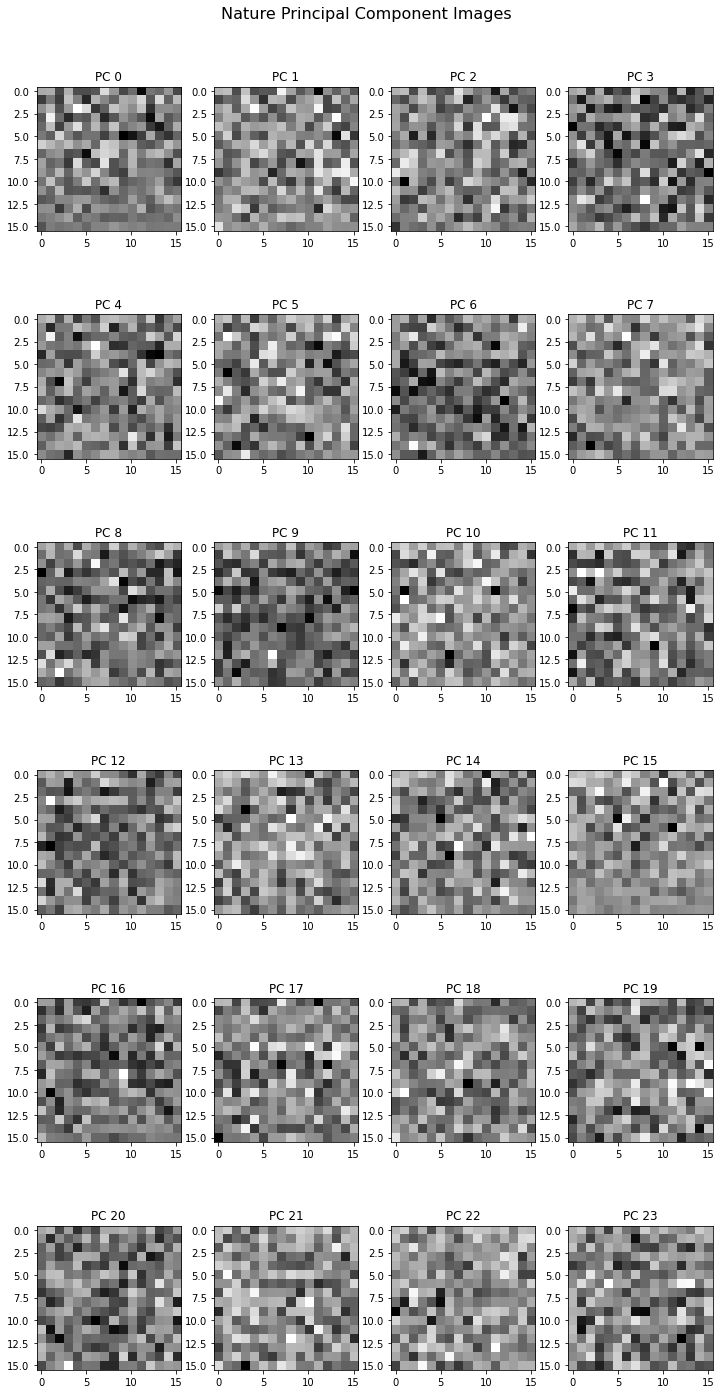

In [21]:
visualize_pc(pca_n, title='Nature Principal Component Images')

In [22]:
def transform_images(pca_instance, images, keep_m = 2, patch_size=(16, 16)):
    ret_images = []
    for image in images:
        img = np.array(get_patches(image, patch_size))

        num_row = int(np.floor(image.shape[0]/patch_size[0]))
        num_col = int(np.floor(image.shape[1]/patch_size[1]))
        
        img_v = img.reshape((img.shape[0], -1)).T

        _, recovered, error = pca_instance.transform(img_v, keep_m)
        recovered= recovered.reshape(img.shape)

        ret_img = np.zeros((num_row*patch_size[0], num_col*patch_size[1]))
        idx=0
        for i in range(num_col):
            for j in range(num_row):
                ret_img[j*patch_size[0]:(j+1)*patch_size[0], i*patch_size[1]:(i+1)*patch_size[1]] = recovered[idx]
                idx+=1
        ret_images.append(ret_img)
    return ret_images

In [23]:
b1 = np.asarray(Image.open('imgpca/b1.jpg'))

b2 = np.asarray(Image.open('imgpca/b2.jpg'))

b3 = np.asarray(Image.open('imgpca/b5.jpg'))

bs = [b1, b2, b3]
correct_proj_1 = transform_images(pca_b,  bs, keep_m=1)
correct_proj_5 = transform_images(pca_b,  bs, keep_m=5)
wrong_proj_1 = transform_images(pca_n,  bs, keep_m=1)
wrong_proj_5 = transform_images(pca_n,  bs, keep_m=5)

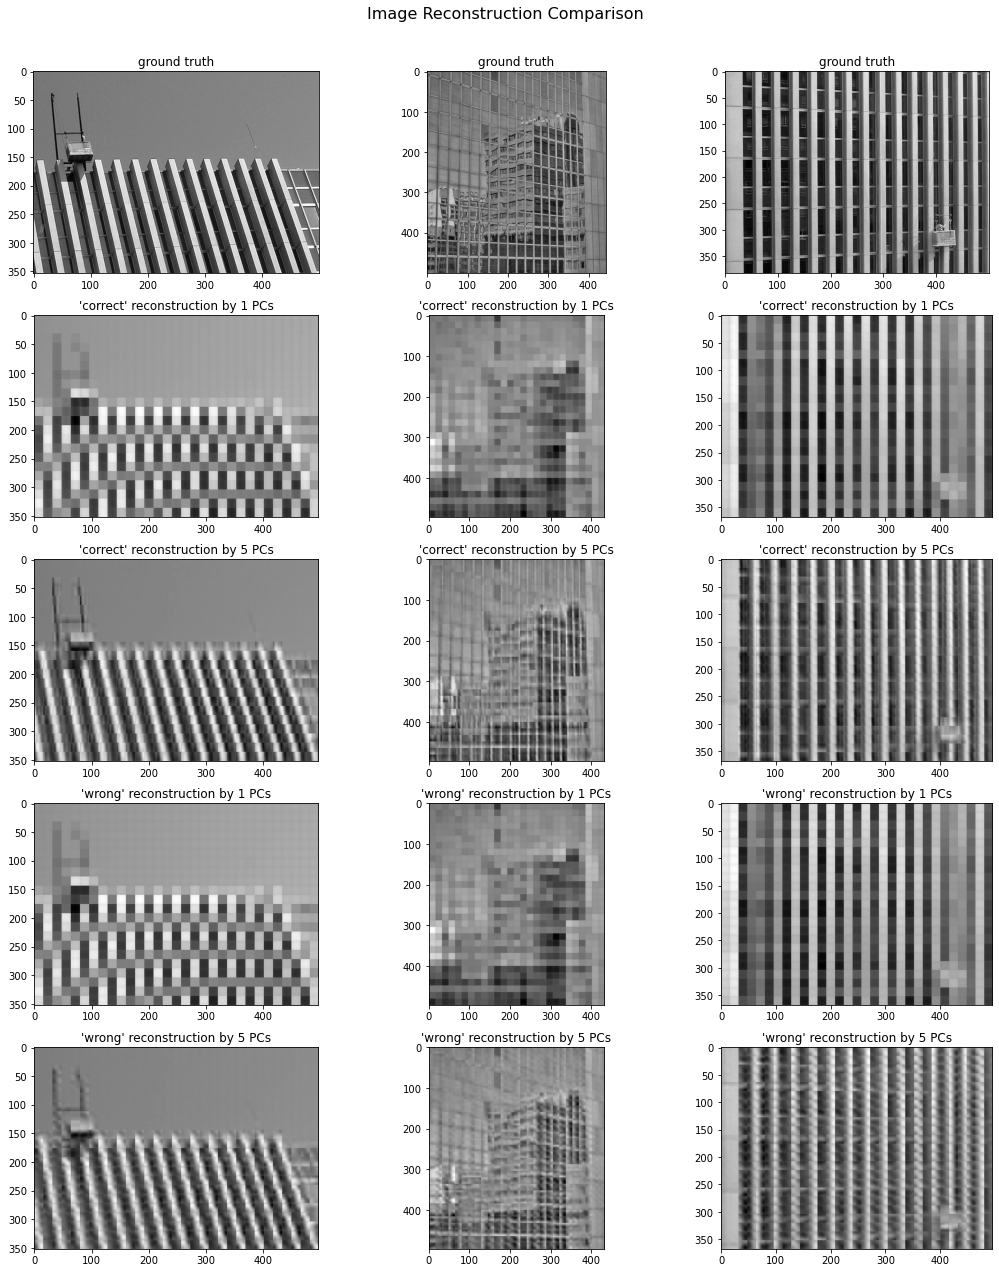

In [24]:
fig, ax = plt.subplots(5,3, figsize=(15,18))
for i, img in enumerate(bs):
    ax[0,i].imshow(img, cmap='gray')
    ax[0,i].set_title('ground truth')

    ax[1,i].imshow(correct_proj_1[i], cmap='gray')
    ax[1,i].set_title("'correct' reconstruction by 1 PCs")

    ax[2,i].imshow(correct_proj_5[i], cmap='gray')
    ax[2,i].set_title("'correct' reconstruction by 5 PCs")

    ax[3,i].imshow(wrong_proj_1[i], cmap='gray')
    ax[3,i].set_title("'wrong' reconstruction by 1 PCs")

    ax[4,i].imshow(wrong_proj_5[i], cmap='gray')
    ax[4,i].set_title("'wrong' reconstruction by 5 PCs")

fig.suptitle('Image Reconstruction Comparison' , fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()